In [1]:
# Imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import gsw
import os

In [2]:
# Load 2017 global CMEMS data
da = xr.open_mfdataset('../Data/CMEMS/all/*.nc',parallel=True)

In [3]:
da

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-01-18T00:13:58Z
    date_issued:                     2019-01-18T00:13:58Z
    date_modified:                   2019-01-18T00:13:58Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-01-18 00:14:00Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika Drifting Phase, Cryosat-2, Haiyan...
    processing_level:                L4
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2017-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2017-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [4]:
# For convinience, change longitude from [0,360] to [-180,180]
with xr.set_options(keep_attrs=True):
    da = da.assign({'longitude':(((da.longitude + 180) % 360) - 180)})

In [5]:
da

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 ... -0.625 -0.375 -0.125
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-01-18T00:13:58Z
    date_issued:                     2019-01-18T00:13:58Z
    date_modified:                   2019-01-18T00:13:58Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-01-18 00:14:00Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Altika Drifting Phase, Cryosat-2, Haiyan...
    processing_level:                L4
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2017-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2017-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [6]:
# Select data within Mengyang's regional box
BOX = [-160,-156,23.5,28.5]
#BOX = [-90,-40,20,50]
#BOX = [110,170,20,50]

# name the subset as ds, to avoid loading the dataset everytime
ds = da.where((da.longitude>BOX[0])&(da.longitude<BOX[1])&\
              (da.latitude>BOX[2])&(da.latitude<BOX[3]),
               drop=True)

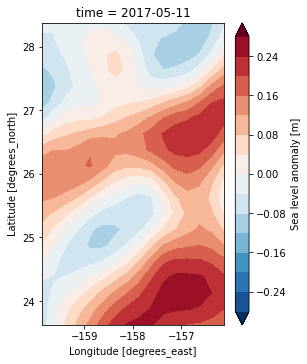

In [8]:
# Sanity check plot
dist1 = gsw.distance([-160,-156],[23.5,23.5])
dist2 = gsw.distance([-156,-156],[23.5,28.5])

kw = {'levels': np.arange(-.28,0.28,0.04),
      'extend': 'both',
      'figsize': (dist1[0]/1e5,dist2[0]/1e5)}
ds.isel(time=130).sla.plot.contourf('longitude','latitude',**kw)

In [9]:
# Plot figures to generate movie
for yearday in range(130,221):
    ds.isel(time=yearday).sla.plot.contourf('longitude','latitude',**kw)
    plt.savefig('figs2movie/'+str(yearday)+'.png',dpi=200)
    plt.close('all')

In [10]:
# Use convert in bash to generate animated gif
#!cd figs2movie
#!convert -delay 20 -loop 0 *.png sla.gif

/bin/bash: convert: command not found


In [10]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob('figs2movie/*.png',recursive = True)

# sort by filename
#sorted(glob.glob('*.png'))

# sort by modification time
imgs = sorted(imgs, key=os.path.getmtime)

# sort by size
#sorted(glob.glob('*.png'), key=os.path.getsize)


In [11]:
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=280, loop=0)